# Toward inclusive voice technologies: Omniligual-asr fast survey for Cameroonian languages

## Overview and context

* The **Omnilingual-ASR project** by Meta provides automatic speech recognition (ASR) support for **21 Cameroonian languages (nov 2025!)**, offering a valuable tool for both public and scientific applications.

* This Notebook examine this work and present direct implication for camerounaian languages(it can be adapte for others too) including: 
* Supported languages 
* Used data
* Performances
* User cases 
* Future work!

## NB: if only result is your interset, just point the last cellule of the notebook(conclusion)
## Gooood exploration for every body!



##  By : Ing Mendo Olame Leo

In [2]:
import pandas as pd

### supported language analysis

In [3]:
# Major camerounian languages

lan_cameroon = {
    "bulu": "bum",
    "bassa": "bas",
    "duala": "dua",
    "fulfulde": "fub",       # Peule Fulfulde au Cameroun
    "eton": "eto",
    "ngomala": "bbj",
    "makaa": "mcp",
    "bakoko": "bkh",
    "feʼfeʼ(Nufi)": "fmp",         # aussi appelé nufi / fotouni
    "ewondo": "ewo",
    "kom": "bkm",
    "bamoun": "bax",
    "tuki": "bag",
    "nso": "lns",
    "ndemli": "nml",
    "buwal": "bhs",
    "oku": "oku",            # langue Oku
    "mambila": "mcu",        # Mambila (Cameroon)
    "isu": "isu",            # Isu (Ring)
    "langbasi": "lna",       # Langbasi (Ubangian)
    "mada": "mxu",           # Mada (Chadic)
    "vemgo-mabas": "vem",    # Vemgo-Mabas (Afro-Asiatic)
    # langues masa tchadiques (plusieurs codes)
    "herdé": "hed",
    "marba": "mpg",
    "massa": "mcn",
    "mesmé": "zim",
    "moussey": "mse",
    "ngeté": "nnn",
    "pévé": "lme",
    "zumaya": "zuy",
    "cameroon_pidgin": "wes" # Cameroonian Pidgin English
}


In [4]:
# Omnilingual-asr training global report(languages,Training Hours, CER)

lang_omniasr= pd.read_csv("/home/mendo/Downloads/LM/LM-5/african-low-resource-speech/Analysis/per_language_results_table_7B_llm_asr.csv")

In [5]:
lang_omniasr.shape

(1683, 3)

In [6]:
lang_omniasr.head(5)

,Language,Training Hours,CER
0,aae_Latn,1.6,22.6
1,aal_Latn,7.1,42.7
2,abb_Latn,8.1,9.2
3,abi_Latn,43.7,2.3
4,abk_Cyrl,33.4,4.9


In [7]:
# retrieve supported languages

valeurs_recherchees = tuple(lan_cameroon.values())
resultat_filtre = lang_omniasr[lang_omniasr['Language'].str.startswith(valeurs_recherchees)]

omnilingualasr_suported = dict(zip( lan_cameroon.values(),lan_cameroon.keys())) # (selon votre logique métier)


In [8]:
resultat_filtre.head(2)

,Language,Training Hours,CER
104,bag_Latn,8.1,6.2
109,bas_Latn,59.8,9.7


In [ ]:
# add full language name

resultat_filtre["Language_full"] = resultat_filtre["Language"].str.split("_").str[0].map(omnilingualasr_suported)


In [10]:
resultat_filtre.head(5)

,Language,Training Hours,CER,Language_full
104,bag_Latn,8.1,6.2,tuki
109,bas_Latn,59.8,9.7,bassa
111,bax_Latn,7.5,8.0,bamoun
115,bbj_Latn,8.9,17.7,ngomala
177,bkh_Latn,6.0,5.6,bakoko


In [11]:
camer_omni_asr =  resultat_filtre

In [12]:
camer_omni_asr = camer_omni_asr.reset_index(drop=True)


### Supported Cameroonian Languages 

In [13]:
camer_omni_asr

,Language,Training Hours,CER,Language_full
0,bag_Latn,8.1,6.2,tuki
1,bas_Latn,59.8,9.7,bassa
2,bax_Latn,7.5,8.0,bamoun
3,bbj_Latn,8.9,17.7,ngomala
4,bkh_Latn,6.0,5.6,bakoko
5,bkm_Latn,8.6,17.4,kom
6,bum_Latn,28.2,8.8,bulu
7,dua_Latn,26.9,5.4,duala
8,eto_Latn,6.3,15.1,eton
9,ewo_Latn,10.5,17.0,ewondo


In [14]:
camer_omni_asr.shape[0]

21

## Training data exploration(Hours)

In [15]:
# Hours exploration

camer_omni_asr.sort_values(by= ['Training Hours'], ascending= False).head(5)

,Language,Training Hours,CER,Language_full
1,bas_Latn,59.8,9.7,bassa
20,zim_Latn,48.1,0.6,mesmé
14,mcp_Latn,40.8,2.8,makaa
13,lns_Latn,40.5,1.8,nso
18,oku_Latn,35.5,2.7,oku


### CER Appreciations

In [16]:


def add_cer_appreciation(df, cer_col="CER"):
    """
    Ajoute une colonne 'CER_appreciation' à un DataFrame pandas
    selon les seuils suivants :
      CER < 5%   -> Excellent
      5 <= CER < 10 -> Bon
      10 <= CER < 20 -> Moyen
      CER >= 20 -> Mauvais
    
    Paramètres :
    df : pandas.DataFrame
        DataFrame contenant la colonne CER
    cer_col : str
        Nom de la colonne CER (par défaut 'CER')
    
    Retour :
    pandas.DataFrame avec une colonne supplémentaire 'CER_appreciation'
    """
    
    def appreciation(cer):
        if cer < 5:
            return "Excellent"
        elif cer < 10:
            return "Bon"
        elif cer < 20:
            return "Moyen"
        else:
            return "Mauvais"
    
    df = df.copy()
    df["CER_appreciation"] = df[cer_col].apply(appreciation)
    return df


In [17]:
camer_omni_asr = add_cer_appreciation(camer_omni_asr)


In [18]:
# Appreciation by performance

Top_lang= camer_omni_asr.sort_values(by= ['CER'], ascending=True)

In [19]:
Top_lang

,Language,Training Hours,CER,Language_full,CER_appreciation
20,zim_Latn,48.1,0.6,mesmé,Excellent
16,mpg_Latn,17.9,1.5,marba,Excellent
13,lns_Latn,40.5,1.8,nso,Excellent
15,mcu_Latn,23.6,2.1,mambila,Excellent
18,oku_Latn,35.5,2.7,oku,Excellent
12,lme_Latn,16.7,2.7,pévé,Excellent
14,mcp_Latn,40.8,2.8,makaa,Excellent
19,wes_Latn,22.5,3.1,cameroon_pidgin,Excellent
11,fub_Latn,10.4,5.2,fulfulde,Bon
7,dua_Latn,26.9,5.4,duala,Bon


In [20]:
# Top 15 represented languages

Top_lang.head(15)

,Language,Training Hours,CER,Language_full,CER_appreciation
20,zim_Latn,48.1,0.6,mesmé,Excellent
16,mpg_Latn,17.9,1.5,marba,Excellent
13,lns_Latn,40.5,1.8,nso,Excellent
15,mcu_Latn,23.6,2.1,mambila,Excellent
18,oku_Latn,35.5,2.7,oku,Excellent
12,lme_Latn,16.7,2.7,pévé,Excellent
14,mcp_Latn,40.8,2.8,makaa,Excellent
19,wes_Latn,22.5,3.1,cameroon_pidgin,Excellent
11,fub_Latn,10.4,5.2,fulfulde,Bon
7,dua_Latn,26.9,5.4,duala,Bon


In [21]:
camer_omni_asr.to_csv("camer_omni_asr.csv", index=False, encoding="utf-8")

In [22]:
df= pd.read_csv("/home/mendo/Downloads/LM/LM-5/african-low-resource-speech/Analysis/camer_omni_asr.csv")

In [23]:
df.head()

,Language,Training Hours,CER,Language_full,CER_appreciation
0,bag_Latn,8.1,6.2,tuki,Bon
1,bas_Latn,59.8,9.7,bassa,Bon
2,bax_Latn,7.5,8.0,bamoun,Bon
3,bbj_Latn,8.9,17.7,ngomala,Moyen
4,bkh_Latn,6.0,5.6,bakoko,Bon


### LANGUAGE PER TRAINING HOUR 

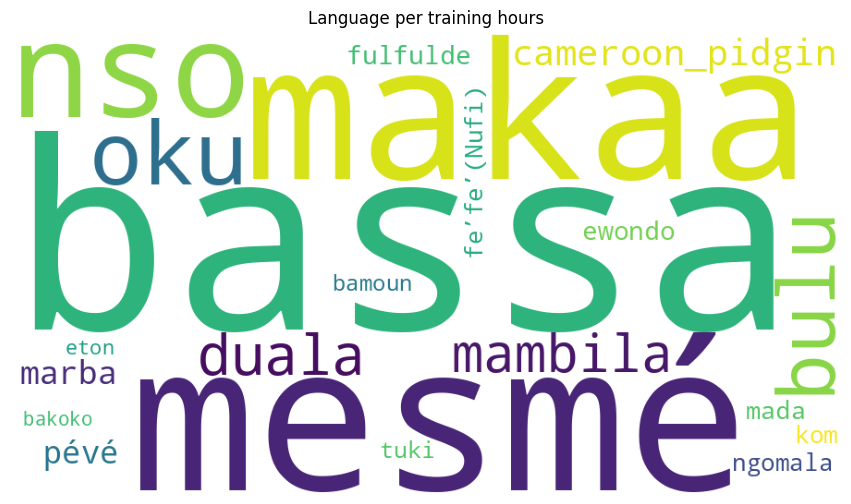

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# dictionnaire : mot → poids
weights = dict(zip(df["Language_full"], df["Training Hours"]))

wordcloud = WordCloud(
    width=900,
    height=500,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(weights)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.to_image())
plt.axis("off")
plt.title("Language per training hours")
plt.show()


###  LANGUAGES PERFORMANCE PER CER

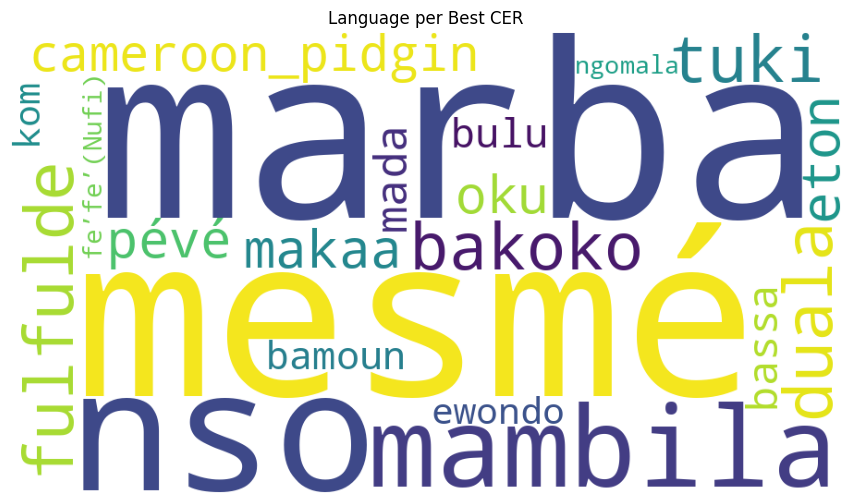

In [32]:

# dictionnaire : mot → poids
weights = dict(zip(df["Language_full"], df["CER"]*(-1)))

wordcloud = WordCloud(
    width=900,
    height=500,
    background_color="white",
    colormap="viridis"
).generate_from_frequencies(weights)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.to_image())
plt.axis("off")
plt.title("Language per Best CER")
plt.show()



# Conclusion: 

## 1. Overview

The **Omnilingual-ASR project** by Meta provides automatic speech recognition (ASR) support for **21 Cameroonian languages**, offering a valuable tool for both public and scientific applications.

## 2. Training Data

* **Training Hours** vary from **6 hours (Bakoko)** to **59 hours (Bassa)** across languages.
* The amount of data correlates partially with ASR performance, but quality and coverage of training data remain crucial.

## 3. Character Error Rate (CER)

* **CER ranges from 0.6% (Mesmé) to 19% (Feʼfeʼ / Nufi)**.
* **Interpretation**:

  * Low CER → high transcription quality.
  * CER ≥ 20% → poor performance.
* **Assessment for Cameroon languages**: CER values are generally **acceptable**, indicating that Omnilingual-ASR already provides reasonably accurate transcriptions.

## 4. Implications and Usage

### Public Applications

Omnilingual-ASR can be directly used for **speech recognition** in languages with low CER, including:

* Ewondo
* Bulu
* Eton
* Bassa
* Bakoko
* Duala
* Bamoun
* Mese
* Marba
* Nso
* Maka'a
* Oku
* Pidgin
* fulfulde
* Tuki

These languages can benefit from **voice-based services**, such as automated transcription(movie subtitle), voice assistants(robot command, phone command, etc), and accessibility tools.

### Scientific / Research Applications

Omnilingual-ASR can serve as a **foundation for building aligned text-audio corpora**, which can then be used to:

* Train **Text-to-Speech (TTS) models**
* Conduct linguistic research and corpus development

> ⚠️ Note: Careful **data verification** is recommended to ensure high-quality TTS training datasets.

---

## 5. Summary

Omnilingual-ASR represents a **strong starting point for low-resource Cameroonian languages**, offering both practical utility and a pathway to **developing TTS systems**. While some languages still require additional data to improve CER, the current performance is **acceptable for many applications**.


# Comming Soon: 
### Extending omnilingual-Asr for other languages without training nor finetuning !!!

## REFERENCE
[Omnilingual-asr Code & paper](https://github.com/facebookresearch/omnilingual-asr)
